<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%207%20-%20Machine%20Learning/exponential_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

יצירת הנתונים

In [2]:
X = np.linspace(0, 3, 300).reshape(-1, 1)
y = np.exp(X) + 0.15 * np.random.randn(*X.shape)  # מוסיפים קצת רעש

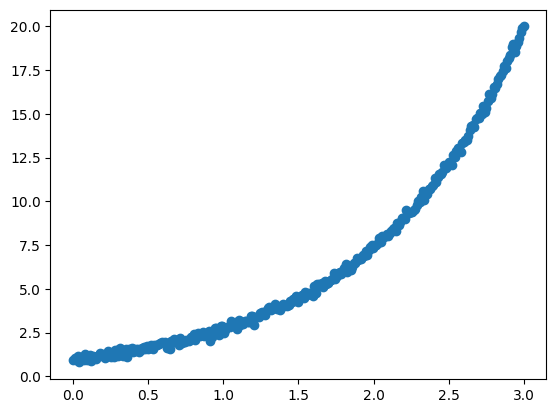

In [3]:
# use matplotlib to visualize the data
plt.scatter(X, y)
plt.show()

In [4]:
# חלוקת הנתונים לאימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# המרת הנתונים לטנסורים
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [5]:
# הגדרת המודל
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

#נא להקפיד להגדיר גם שכבות וגם פונקציית עבודה קדימה בצורה מסודרת
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)

        return x

In [6]:
# יצירת אינסטנס של המודל
model = Classifier()

# הגדרת פונקציית הפסד ואופטימיזר
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# לולאת אימון המודל כולל הדפסת ההפסד כל כ 1000 צעדים
epochs = 1000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    if epoch%100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss : {loss.item() :.2f}")

Epoch 0/1000, Loss : 64.00
Epoch 100/1000, Loss : 2.49
Epoch 200/1000, Loss : 0.10
Epoch 300/1000, Loss : 0.03
Epoch 400/1000, Loss : 0.02
Epoch 500/1000, Loss : 0.02
Epoch 600/1000, Loss : 0.02
Epoch 700/1000, Loss : 0.02
Epoch 800/1000, Loss : 0.02
Epoch 900/1000, Loss : 0.02


In [7]:
# הערכת המודל הסופי
# העברת המודל למצב הערכה (evaluation mode)
model.eval()
# מבצעים תחזיות על נתוני הבדיקה
with torch.no_grad():
    predictions = (model(X_test_tensor)).float()

# שימו לב - זו בעיית רגרסיה לכן יש לבדוק את המודל באמצעות
# חישוב RMSE והדפסת התוצאה

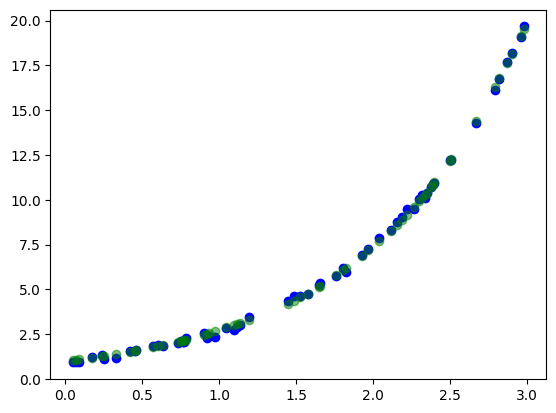

In [8]:
#אם רוצים אפשר ליצור גרף של תחזיות לעומת טנסור תויות הבדיקה

plt.scatter(X_test_tensor, y_test_tensor, c='blue')
plt.scatter(X_test_tensor, predictions.numpy(), c='green', alpha=0.5)
plt.show()

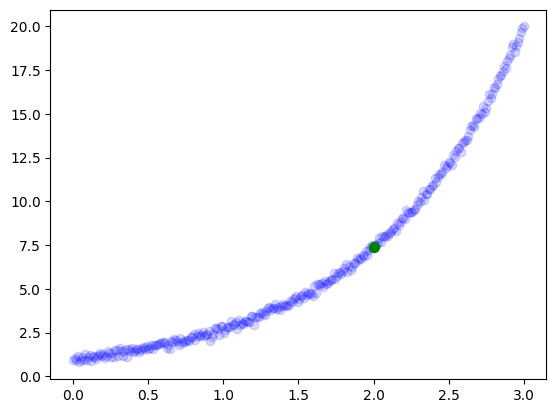

In [9]:
plt.scatter(torch.tensor(X), torch.tensor(y), c='blue', alpha=0.15)
x_to_test = torch.tensor(2.0)
plt.scatter(x_to_test.numpy(), model(x_to_test.view(-1, 1)).detach().numpy(), c='green', s=50)
plt.show()